In [1]:
import fastf1
import pandas as pd
import logging
logging.getLogger('fastf1').setLevel(logging.CRITICAL)  # Use logging.INFO or logging.warning for more information

# Given lists for years and number of rounds
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
num_races= [22, 22, 18, 22, 23, 23, 12]

# Initialize an empty DataFrame for weather
weather = pd.DataFrame()

# Loop through each year and number of races
for year, num_race in zip(years, num_races):
    # Initialize an empty DataFrame for each year
    df = pd.DataFrame()
    
    # Get race data for each round
    for x in range(1, num_race):
        race_session = fastf1.get_session(year, x, 'R').event
        df = pd.concat([df, pd.DataFrame([race_session])], ignore_index=True)
    
    # Get weather data for each race
    for track in df['Location']:
        race_session = fastf1.get_session(year, track, 'R')
        race_session.load()  # Load the data before accessing it
        weather_data = race_session.weather_data
        name_circuit = race_session.session_info['Meeting']['Name']
        round_number = df.loc[df['Location'] == track, 'RoundNumber'].values[0]  # Get the round number for the race
        weather_data['Round Number'] = round_number
        weather_data['Year'] = year
        weather_data['Track'] = track
        weather_data['Grand_Prix_Name'] = name_circuit
        weather = pd.concat([weather, weather_data])
        print(f"{track}, Year: {year}")

# Save the combined weather data to a CSV file 
weather.to_csv(f'F1_weather.csv', encoding='utf-8', index=False)

# Print a success message
print(f"Weather data for Formula 1 races in 2018-2023 has been saved to F1_weather.csv")

name: Australian Grand Prix
Melbourne, Year: 2018
name: Bahrain Grand Prix
Sakhir, Year: 2018
name: Chinese Grand Prix
Shanghai, Year: 2018
name: Azerbaijan Grand Prix
Baku, Year: 2018
name: Spanish Grand Prix
Barcelona, Year: 2018
name: Monaco Grand Prix
Monte Carlo, Year: 2018
name: Canadian Grand Prix
Montréal, Year: 2018
name: French Grand Prix
Le Castellet, Year: 2018
name: Austrian Grand Prix
Spielberg, Year: 2018
name: British Grand Prix
Silverstone, Year: 2018
name: German Grand Prix
Hockenheim, Year: 2018
name: Hungarian Grand Prix
Budapest, Year: 2018
name: Belgian Grand Prix
Spa-Francorchamps, Year: 2018
name: Italian Grand Prix
Monza, Year: 2018
name: Singapore Grand Prix
Singapore, Year: 2018
name: Russian Grand Prix
Sochi, Year: 2018
name: Japanese Grand Prix
Suzuka, Year: 2018
name: United States Grand Prix
Austin, Year: 2018
name: Mexican Grand Prix
Mexico City, Year: 2018
name: Brazilian Grand Prix
São Paulo, Year: 2018
name: Abu Dhabi Grand Prix
Yas Marina, Year: 2018

In [4]:
weather_data = pd.read_csv('data/F1_weather.csv')
columns_to_mean = ['AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']

mean_weather_data = weather_data.groupby(['Year', 'Track', 'Grand_Prix_Name'])[columns_to_mean].mean().reset_index()
mean_weather_data.to_csv('weather_data_mean.csv', index=False)
print('Mean weather data saved to Mean_weather_data.csv')


Mean weather data saved to Mean_weather_data.csv


In [7]:
import pandas as pd
data = pd.read_csv('data/data_final.csv')
statusId = data['statusId']
rainfall = data['Rainfall']
type(rainfall[0])

numpy.float64

In [9]:
data = pd.read_csv('data/data_final.csv')
data['count_GP'] = data.groupby('surname')['surname'].transform('count')
data.to_csv("new_data_final.csv", index=False)

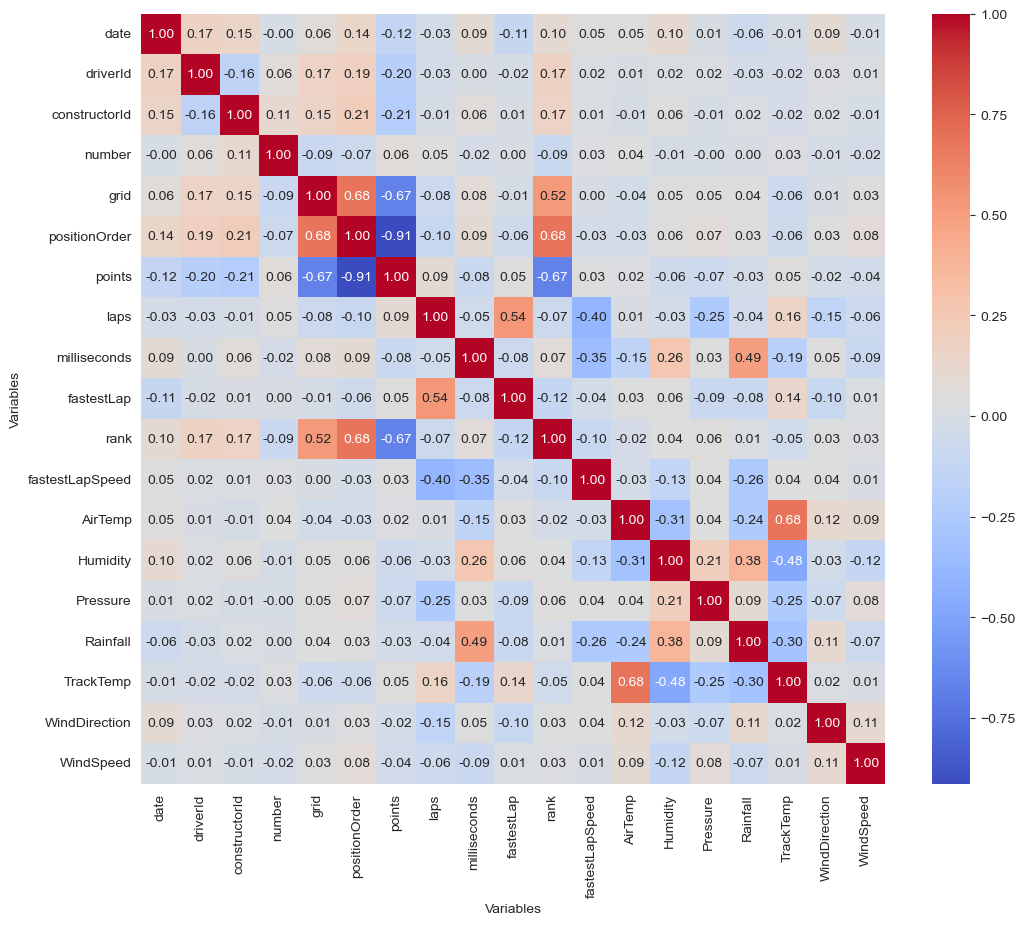

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/data_matrice.csv', na_values='\\N')
df = df.dropna()

corr = df.corr()
# sns.heatmap(corr, annot=True)
# plt.figure(figsize=(50,50))

plt.figure(figsize=(12, 10))

# Tracer la heatmap avec des annotations et une taille de police ajustée
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

# Ajouter des labels aux axes
plt.xlabel('Variables')
plt.ylabel('Variables')

# Afficher la figure
plt.show()

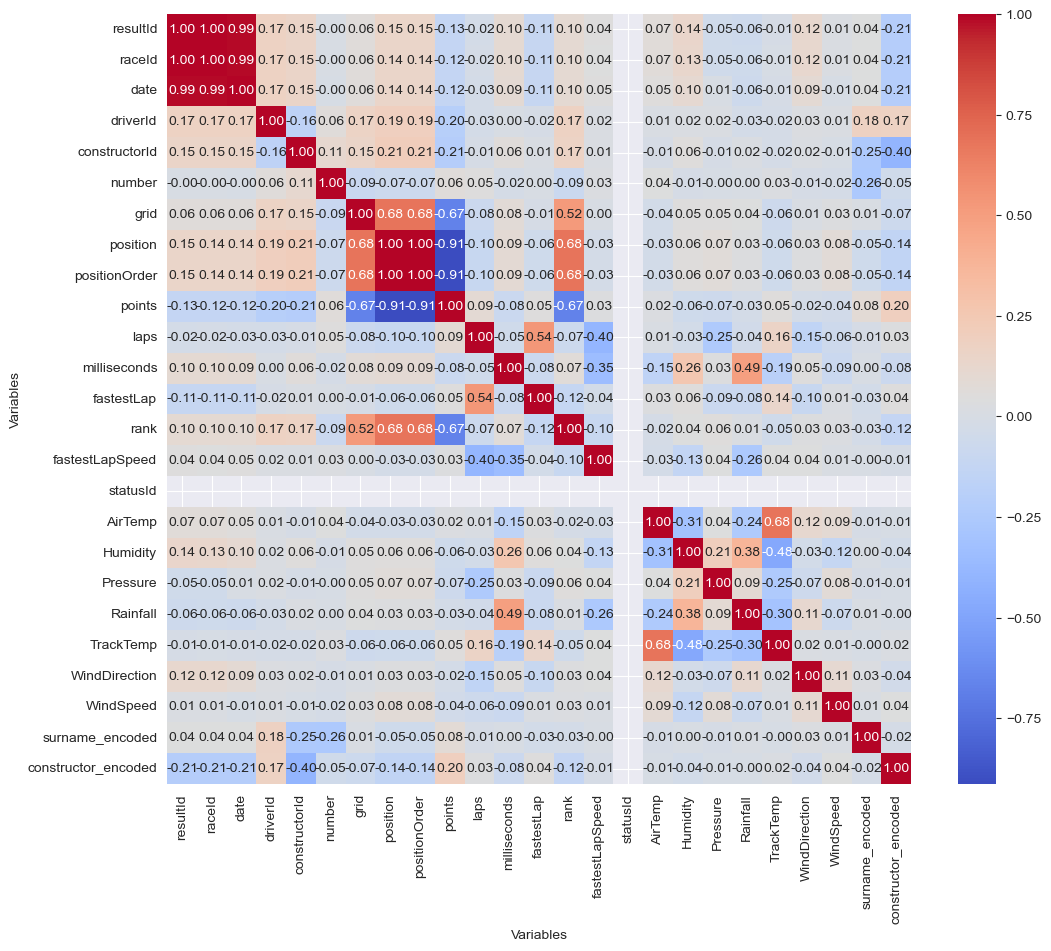

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Charger les données
df = pd.read_csv('data/data_final.csv', na_values='\\N')

# Supprimer les valeurs manquantes
df = df.dropna()

# Vérifier si la colonne 'surname' existe
if 'surname' in df.columns:
    # Encoder la colonne 'surname'
    label_encoder = LabelEncoder()
    df['surname_encoded'] = label_encoder.fit_transform(df['surname'])
    df['constructor_encoded'] = label_encoder.fit_transform(df['name'])

    # Sélectionner uniquement les colonnes numériques
    df_numeric = df.select_dtypes(include=[np.number])

    # Standardiser les données
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

    # Calculer la matrice de corrélation
    corr = df_scaled.corr()

    # Tracer la heatmap avec des annotations et une taille de police ajustée
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

    # Ajouter des labels aux axes
    plt.xlabel('Variables')
    plt.ylabel('Variables')

    # Afficher la figure
    plt.show()
else:
    print("La colonne 'surname' n'existe pas dans le DataFrame.")
